# k-최근접이웃의 한계 및 선형 회귀

In [1]:
import numpy as np

In [2]:
### 데이터 생성하기 
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# 훈련및 테스트데이터분류하여 가지고오기
# 총 4개의 변수값을 반환해 줍니다

# test_size : 테스트데이터의 비율
# train_size : 훈련데이터의 비율
# 기본적으로 train : test = 75:25의 비율을 사용 (대략적인 비율)
# 일반적으로 훈련과 테스트 비율은 7:3 또는 7.5:2.5 비율로 사용 ******* 시험출제 *******
train_input, test_input, train_target, test_target = \
    train_test_split(perch_length,perch_weight, random_state=42)

In [5]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input)
print('----------')
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
----------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor

### 클래스(모델) 이름 :KNeighborsRegressor()
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [19]:
knr = KNeighborsRegressor(n_neighbors=3)

In [20]:
### 훈련데이터 학습 시키기 : 훈련모델 생성하기
knr.fit(train_input,train_target) # 따로 저장안해도 knr에 저장 

KNeighborsRegressor(n_neighbors=3)

In [21]:
knr.score(test_input, test_target)

0.9746459963987609

In [22]:
#예측데이터 : 50 
### 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
knr.predict([[50]])

array([1033.33333333])

In [23]:
# 이웃데이터 추출하기 
distances, indexes = knr.kneighbors([[50]])

Text(0.5, 1.0, '농어의 길이에 따른 무게 그래프')

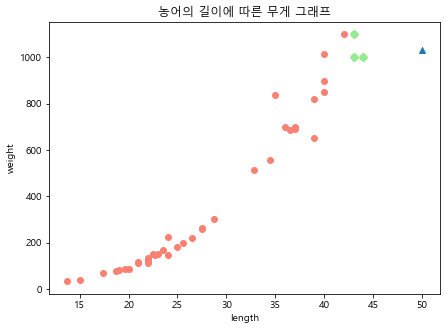

In [24]:
import matplotlib.pyplot as plt

plt.rc('font',family = 'Malgun Gothic')

plt.figure(figsize = (7,5))
plt.scatter(train_input,train_target,c='salmon')

plt.scatter(50,knr.predict([[50]]),marker='^')
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D',c='lightgreen')


plt.xlabel('length')
plt.ylabel('weight')
plt.title('농어의 길이에 따른 무게 그래프')

In [17]:
## 훈련데이터 범위내에서 특정값 예측시에는 사용가능하나 훈련데이터 밖의 값은 예측 불가 

### 선형회귀 (Linear Regression)
#### - 많이 사용되는 대표적인 회귀 알고리즘
#### - 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행시 초반에 주로 진행
#### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
#### - 직선을 '추세선' 이라고 합니다
#### - 선형 회귀 알고리즘 : 1차방정식 ( y = ax + b)
#### - 선형회귀 클래스(모델) : LinearTegression
#### - 사용되는 패키지 : sklearn_linear_model